In [1]:
# loading necesary libaries 
import pandas as pd
import os


In [2]:
os.getcwd()

'C:\\Users\\WELLS\\Documents\\rebuilding portfolio projects\\DecoderBot\\Flight Price Pred'

In [3]:
data = pd.read_csv(r"C:\\Users\\WELLS\\Documents\\rebuilding portfolio projects\\DecoderBot\\Flight Price Pred\\Task 3- Flight Price Prediction Task.csv")

In [4]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
data.shape

(10683, 11)

### Data Cleaning

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
# dropping rows with missing values
data.dropna(inplace = True)

In [8]:
data.shape

(10682, 11)

In [9]:
# correcting datatypes
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])

C:\Users\WELLS\AppData\Local\Temp\ipykernel_11944\3359357030.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])


In [10]:
# 'Route' and 'Total Stops' column contains the same information, so to avoid multi-collinearity, we would remove the Route column
data.drop(columns = ['Route'], inplace = True)

In [11]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Dep_Time         10682 non-null  object        
 5   Arrival_Time     10682 non-null  object        
 6   Duration         10682 non-null  object        
 7   Total_Stops      10682 non-null  object        
 8   Additional_Info  10682 non-null  object        
 9   Price            10682 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 918.0+ KB


In [13]:
# correcting datatypes
data['Dep_Time'] = pd.to_datetime(data['Dep_Time'])

In [14]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,2024-02-06 22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,2024-02-06 05:50:00,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,2024-02-06 09:25:00,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,2024-02-06 18:05:00,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,2024-02-06 16:50:00,21:35,4h 45m,1 stop,No info,13302


In [15]:
data['Dep_time'] = data['Dep_Time'].dt.time

In [16]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_time
0,IndiGo,2019-03-24,Banglore,New Delhi,2024-02-06 22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897,22:20:00
1,Air India,2019-01-05,Kolkata,Banglore,2024-02-06 05:50:00,13:15,7h 25m,2 stops,No info,7662,05:50:00
2,Jet Airways,2019-09-06,Delhi,Cochin,2024-02-06 09:25:00,04:25 10 Jun,19h,2 stops,No info,13882,09:25:00
3,IndiGo,2019-12-05,Kolkata,Banglore,2024-02-06 18:05:00,23:30,5h 25m,1 stop,No info,6218,18:05:00
4,IndiGo,2019-01-03,Banglore,New Delhi,2024-02-06 16:50:00,21:35,4h 45m,1 stop,No info,13302,16:50:00


In [17]:
data.drop(columns = ['Dep_Time'], inplace = True)

In [18]:
# correcting datatypes
data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'])

In [19]:
data['Arrival_time'] = data['Arrival_Time'].dt.time

In [20]:
data.drop(columns = ['Arrival_Time'], inplace = True)

In [21]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Dep_time,Arrival_time
0,IndiGo,2019-03-24,Banglore,New Delhi,2h 50m,non-stop,No info,3897,22:20:00,01:10:00
1,Air India,2019-01-05,Kolkata,Banglore,7h 25m,2 stops,No info,7662,05:50:00,13:15:00
2,Jet Airways,2019-09-06,Delhi,Cochin,19h,2 stops,No info,13882,09:25:00,04:25:00
3,IndiGo,2019-12-05,Kolkata,Banglore,5h 25m,1 stop,No info,6218,18:05:00,23:30:00
4,IndiGo,2019-01-03,Banglore,New Delhi,4h 45m,1 stop,No info,13302,16:50:00,21:35:00


### Feature Engineering

In [22]:
data['dep_time_category'] = data['Dep_time'].apply(lambda x: 'Morning' if x.hour < 12 else ('Afternoon' if x.hour < 16 else ('Evening' if x.hour < 20 else 'Night')))

In [23]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Dep_time,Arrival_time,dep_time_category
0,IndiGo,2019-03-24,Banglore,New Delhi,2h 50m,non-stop,No info,3897,22:20:00,01:10:00,Night
1,Air India,2019-01-05,Kolkata,Banglore,7h 25m,2 stops,No info,7662,05:50:00,13:15:00,Morning
2,Jet Airways,2019-09-06,Delhi,Cochin,19h,2 stops,No info,13882,09:25:00,04:25:00,Morning
3,IndiGo,2019-12-05,Kolkata,Banglore,5h 25m,1 stop,No info,6218,18:05:00,23:30:00,Evening
4,IndiGo,2019-01-03,Banglore,New Delhi,4h 45m,1 stop,No info,13302,16:50:00,21:35:00,Evening


In [24]:
data['arrival_time_category'] = data['Arrival_time'].apply(lambda x: 'Morning' if x.hour < 12 else ('Afternoon' if x.hour < 16 else ('Evening' if x.hour < 20 else 'Night')))

In [25]:
data.drop(columns = ['Additional_Info', 'Dep_time', 'Arrival_time'], inplace = True)

In [26]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price,dep_time_category,arrival_time_category
0,IndiGo,2019-03-24,Banglore,New Delhi,2h 50m,non-stop,3897,Night,Morning
1,Air India,2019-01-05,Kolkata,Banglore,7h 25m,2 stops,7662,Morning,Afternoon
2,Jet Airways,2019-09-06,Delhi,Cochin,19h,2 stops,13882,Morning,Morning
3,IndiGo,2019-12-05,Kolkata,Banglore,5h 25m,1 stop,6218,Evening,Night
4,IndiGo,2019-01-03,Banglore,New Delhi,4h 45m,1 stop,13302,Evening,Night


In [27]:
# extracting the months from the date_of_journey column
data['months'] = data.Date_of_Journey.dt.month

In [28]:
# copying the data to another dataframe in order to test the two features selection on the accuracy of the model
data_months = data.copy()

In [29]:
map_dict = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

data_months['months'] = data_months['months'].map(map_dict)

In [30]:
data_months.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price,dep_time_category,arrival_time_category,months
0,IndiGo,2019-03-24,Banglore,New Delhi,2h 50m,non-stop,3897,Night,Morning,March
1,Air India,2019-01-05,Kolkata,Banglore,7h 25m,2 stops,7662,Morning,Afternoon,January
2,Jet Airways,2019-09-06,Delhi,Cochin,19h,2 stops,13882,Morning,Morning,September
3,IndiGo,2019-12-05,Kolkata,Banglore,5h 25m,1 stop,6218,Evening,Night,December
4,IndiGo,2019-01-03,Banglore,New Delhi,4h 45m,1 stop,13302,Evening,Night,January


In [31]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price,dep_time_category,arrival_time_category,months
0,IndiGo,2019-03-24,Banglore,New Delhi,2h 50m,non-stop,3897,Night,Morning,3
1,Air India,2019-01-05,Kolkata,Banglore,7h 25m,2 stops,7662,Morning,Afternoon,1
2,Jet Airways,2019-09-06,Delhi,Cochin,19h,2 stops,13882,Morning,Morning,9
3,IndiGo,2019-12-05,Kolkata,Banglore,5h 25m,1 stop,6218,Evening,Night,12
4,IndiGo,2019-01-03,Banglore,New Delhi,4h 45m,1 stop,13302,Evening,Night,1


In [32]:
data_months.drop(columns = ['Date_of_Journey'], inplace = True)
data.drop(columns = ['Date_of_Journey'], inplace = True)

In [33]:
data['duration_in_min'] = data['Duration'].apply(lambda x: int(x.split('h')[0]) * 60 + int(x.split(' ')[-1][:-1]) if 'h' in x else int(x.split('m')[0]))

In [34]:
data_months['duration_in_min'] = data_months['Duration'].apply(lambda x: int(x.split('h')[0]) * 60 + int(x.split(' ')[-1][:-1]) if 'h' in x else int(x.split('m')[0]))

In [35]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,dep_time_category,arrival_time_category,months,duration_in_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,Night,Morning,3,170
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,Morning,Afternoon,1,445
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,Morning,Morning,9,1159
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,Evening,Night,12,325
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,Evening,Night,1,285


In [36]:
data_months.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,dep_time_category,arrival_time_category,months,duration_in_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,Night,Morning,March,170
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,Morning,Afternoon,January,445
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,Morning,Morning,September,1159
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,Evening,Night,December,325
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,Evening,Night,January,285


In [37]:
data.drop(columns = ['Duration'], inplace = True)
data_months.drop(columns = ['Duration'], inplace = True)

In [38]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [39]:
dict_ = {
    'non-stop': 0,
    '2 stops': 2,
    '1 stop': 1,
    '3 stops': 3,
    '4 stops': 4
}

data['number_of_stops'] = data['Total_Stops'].map(dict_)
data_months['number_of_stops'] = data_months['Total_Stops'].map(dict_)

In [40]:
data.drop(columns = ['Total_Stops'], inplace = True)
data_months.drop(columns = ['Total_Stops'], inplace = True)

In [41]:
data.head()

,Airline,Source,Destination,Price,dep_time_category,arrival_time_category,months,duration_in_min,number_of_stops
0,IndiGo,Banglore,New Delhi,3897,Night,Morning,3,170,0
1,Air India,Kolkata,Banglore,7662,Morning,Afternoon,1,445,2
2,Jet Airways,Delhi,Cochin,13882,Morning,Morning,9,1159,2
3,IndiGo,Kolkata,Banglore,6218,Evening,Night,12,325,1
4,IndiGo,Banglore,New Delhi,13302,Evening,Night,1,285,1


In [42]:
data_months.head()

,Airline,Source,Destination,Price,dep_time_category,arrival_time_category,months,duration_in_min,number_of_stops
0,IndiGo,Banglore,New Delhi,3897,Night,Morning,March,170,0
1,Air India,Kolkata,Banglore,7662,Morning,Afternoon,January,445,2
2,Jet Airways,Delhi,Cochin,13882,Morning,Morning,September,1159,2
3,IndiGo,Kolkata,Banglore,6218,Evening,Night,December,325,1
4,IndiGo,Banglore,New Delhi,13302,Evening,Night,January,285,1


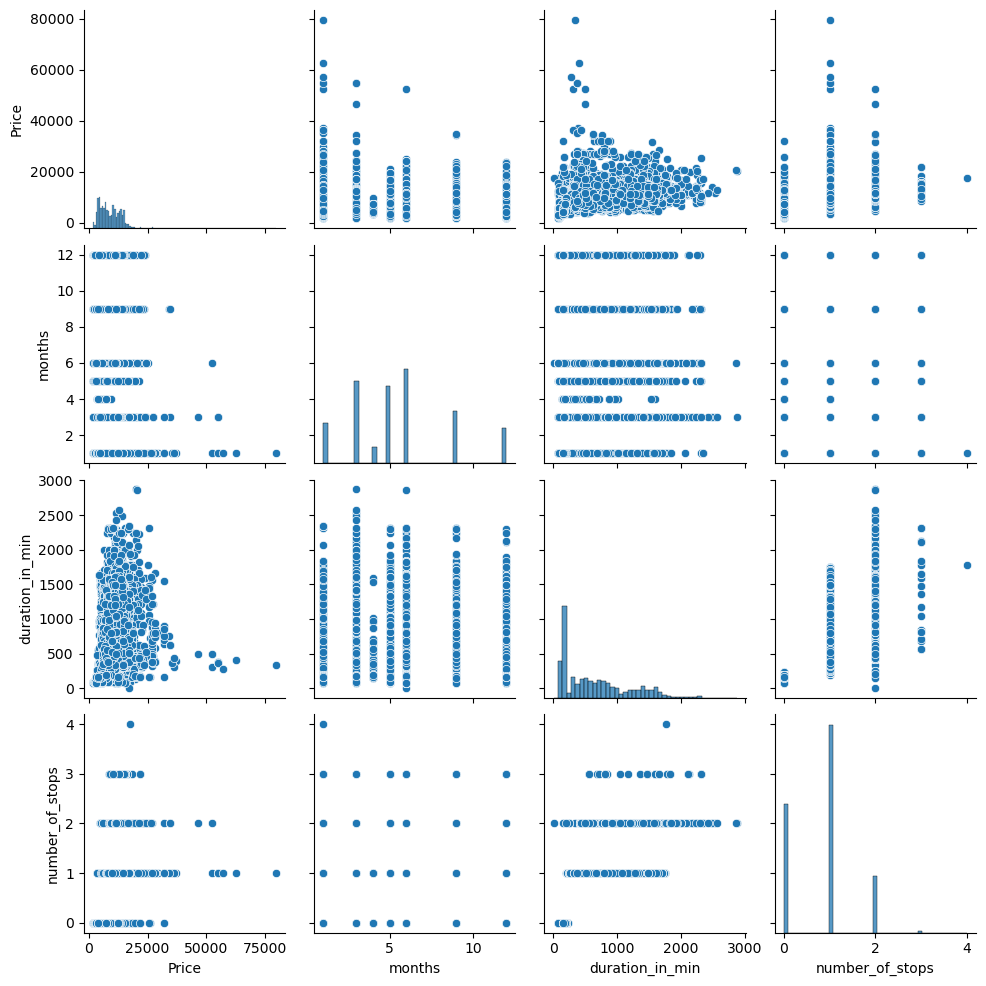

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data)
plt.show()

### Linear Regression on the data dataframe

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.ensemble import RandomForestRegressor

In [45]:
X = data[['Airline', 'Source', 'Destination', 'dep_time_category', 'arrival_time_category', 'months', 'duration_in_min', 'number_of_stops']]
y = data['Price']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [47]:
numeric_cols = ['months', 'duration_in_min', 'number_of_stops']
categorical_cols = ['Airline', 'Source', 'Destination', 'dep_time_category', 'arrival_time_category']

In [48]:
# scaling the training data
scaler = MinMaxScaler()
scaler.fit(X_train[numeric_cols])

MinMaxScaler()

In [49]:
X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [50]:
enc = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
enc.fit(X_train[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [51]:
encoded_cols = list(enc.get_feature_names_out(categorical_cols))

In [52]:
X_train[encoded_cols] = enc.transform(X_train[categorical_cols])
X_test[encoded_cols] = enc.transform(X_test[categorical_cols])

In [53]:
X_train.drop(columns = categorical_cols, inplace = True)
X_test.drop(columns = categorical_cols, inplace = True)

In [54]:
print(X_train.shape)
print(X_test.shape)

(8545, 34)
(2137, 34)


In [55]:
X_train.head()

,months,duration_in_min,number_of_stops,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,...,Destination_Kolkata,Destination_New Delhi,dep_time_category_Afternoon,dep_time_category_Evening,dep_time_category_Morning,dep_time_category_Night,arrival_time_category_Afternoon,arrival_time_category_Evening,arrival_time_category_Morning,arrival_time_category_Night
10005,0.363636,0.223620,0.25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3684,0.727273,0.524109,0.25,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1034,0.272727,0.131027,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3909,0.181818,0.265549,0.25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3088,0.454545,0.552411,0.50,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [56]:
y_train.head()

10005     9149
3684     12373
1034      5583
3909      7695
3088     11972
Name: Price, dtype: int64

In [57]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [58]:
train_pred = linear_model.predict(X_train)
test_pred = linear_model.predict(X_test)

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
train_mse = mean_squared_error(y_train, train_pred, squared = False)
test_mse = mean_squared_error(y_test, test_pred, squared = False)
print(train_mse)
print(test_mse)

2906.0113349129388
2966.6389945850833


### Linear Regression on the data_months dataframe

In [60]:
X_ = data_months[['Airline', 'Source', 'Destination', 'dep_time_category', 'arrival_time_category', 'months', 'duration_in_min', 'number_of_stops']]
y_ = data_months['Price']

In [61]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size = 0.2, random_state = 42)

In [62]:
numeric_cols_ = ['duration_in_min', 'number_of_stops']
categorical_cols_ = ['Airline', 'Source', 'Destination', 'dep_time_category', 'arrival_time_category', 'months']

In [63]:
# scaling the training data
scaler_ = MinMaxScaler()
scaler_.fit(X_train_[numeric_cols_])

MinMaxScaler()

In [64]:
X_train_[numeric_cols_] = scaler_.transform(X_train_[numeric_cols_])
X_test_[numeric_cols_] = scaler_.transform(X_test_[numeric_cols_])

In [65]:
enc_ = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
enc_.fit(X_train_[categorical_cols_])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [66]:
encoded_cols_ = list(enc_.get_feature_names_out(categorical_cols_))

In [67]:
X_train_[encoded_cols_] = enc_.transform(X_train_[categorical_cols_])
X_test_[encoded_cols_] = enc_.transform(X_test_[categorical_cols_])

In [68]:
X_train_.drop(columns = categorical_cols_, inplace = True)
X_test_.drop(columns = categorical_cols_, inplace = True)

In [69]:
print(X_train_.shape)
print(X_test_.shape)

(8545, 40)
(2137, 40)


In [70]:
X_train_.head()

,duration_in_min,number_of_stops,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,...,arrival_time_category_Evening,arrival_time_category_Morning,arrival_time_category_Night,months_April,months_December,months_January,months_June,months_March,months_May,months_September
10005,0.223620,0.25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3684,0.524109,0.25,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1034,0.131027,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3909,0.265549,0.25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3088,0.552411,0.50,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [71]:
linear_model_ = LinearRegression()
linear_model_.fit(X_train_, y_train_)

LinearRegression()

In [72]:
train_pred_ = linear_model_.predict(X_train_)
test_pred_ = linear_model_.predict(X_test_)

In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
train_mse_ = mean_squared_error(y_train_, train_pred_, squared = False)
test_mse_ = mean_squared_error(y_test_, test_pred_, squared = False)
print(train_mse_)
print(test_mse_)

2882.7156058158153
2912.5074465332054


As we can see the data_months dataframe fed to the model gave a better model than the data dataframe, whcih tells us that performing one-hot-encoding on the months has better information than leaving the months numerical

### Random Forest Regressor

In [74]:
model = RandomForestRegressor()
model.fit(X_train_, y_train_)

RandomForestRegressor()

In [75]:
train_pred_ = model.predict(X_train_)
test_pred_ = model.predict(X_test_)

In [76]:
train_mse_ = mean_squared_error(y_train_, train_pred_, squared = False)
test_mse_ = mean_squared_error(y_test_, test_pred_, squared = False)
print("train MSE: {}".format(train_mse_))
print("test MSE: {}".format(test_mse_))

train MSE: 1546.8896572843444
test MSE: 2466.5586834241967


**Performing Hyperparameter tuning**

In [77]:
# Using Grid Search to tune and find the best hyperparameters that reduces the mean_squared_error

model = RandomForestRegressor(random_state = 42, n_jobs = -1)
params = {
    'n_estimators' : [50, 100],
    'criterion' : ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_depth' : [10, None],
    'min_samples_split' : [2, 3],
    'min_samples_leaf' : [2, 3],
    'max_features': ['sqrt', 'log2', None],
    'max_leaf_nodes': [2, 3]
}

grid_search = GridSearchCV(estimator = model, param_grid = params, cv=5, scoring = 'neg_mean_squared_error')

grid_search.fit(X_train_, y_train_)

# Get the best model from the search
best_svm_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(best_svm_model)
print(best_params)

train_pred_ = grid_search.predict(X_train_)
test_pred_ = grid_search.predict(X_test_)

train_mse_ = mean_squared_error(y_train_, train_pred_, squared = False)
test_mse_ = mean_squared_error(y_test_, test_pred_, squared = False)
print("train MSE: {}".format(train_mse_))
print("test MSE: {}".format(test_mse_))

train_r2_ = r2_score(y_train_, train_pred_)
test_r2_ = r2_score(y_test_, test_pred_)
print("train r2 score: {}".format(train_r2_))
print("test r2 score: {}".format(test_r2_))

RandomForestRegressor(max_depth=10, max_features=None, max_leaf_nodes=3,
                      min_samples_leaf=2, n_jobs=-1, random_state=42)
{'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
train MSE: 3284.2462889299004
test MSE: 3472.501133562351
train r2 score: 0.4909627151223216
test r2 score: 0.44076464965543727


In [116]:
model = RandomForestRegressor(random_state = 42, n_jobs = -1, max_depth = 12, n_estimators = 300)
model.fit(X_train_, y_train_)
train_pred_ = model.predict(X_train_)
test_pred_ = model.predict(X_test_)

train_mse_ = mean_squared_error(y_train_, train_pred_, squared = False)
test_mse_ = mean_squared_error(y_test_, test_pred_, squared = False)
print("train MSE: {}".format(train_mse_))
print("test MSE: {}".format(test_mse_))

train_r2_ = r2_score(y_train_, train_pred_)
test_r2_ = r2_score(y_test_, test_pred_)
print("train r2 score: {}".format(train_r2_))
print("test r2 score: {}".format(test_r2_))

train MSE: 1851.2467813017095
test MSE: 2304.5632702875373
train r2 score: 0.8382639654132313
test r2 score: 0.7536871350805707


In [117]:
importance = model.feature_importances_

In [121]:
print(importance)

[5.69660040e-01 3.88385834e-02 1.53037519e-03 7.01797180e-03
 2.16153545e-03 4.58361533e-03 6.61475162e-02 7.35241164e-02
 2.35434215e-02 6.17922678e-04 3.28433849e-03 1.40822641e-06
 3.22750513e-03 4.53041021e-05 9.05145400e-03 7.89666129e-04
 3.94291504e-03 2.54253087e-03 4.54958652e-03 2.85231655e-03
 4.51082295e-03 5.33924587e-04 4.92179605e-03 6.74233455e-04
 1.81168529e-02 3.65290230e-03 5.27295379e-03 5.20161824e-03
 8.25057002e-03 6.72542825e-03 4.32404111e-03 8.92222248e-03
 6.77060547e-03 6.20832462e-04 2.20669683e-03 6.51673715e-02
 1.45414873e-02 1.36704857e-02 4.42164737e-03 3.58138421e-03]


In [122]:
X_train_.columns

Index(['duration_in_min', 'number_of_stops', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'dep_time_category_Afternoon',
       'dep_time_category_Evening', 'dep_time_category_Morning',
       'dep_time_category_Night', 'arrival_time_category_Afternoon',
       'arrival_time_category_Evening', 'arrival_time_category_Morning',
       'arrival_time_category_Night', 'months_April', 'months_December',
       'months_January', 'months_June', 'months_March', 

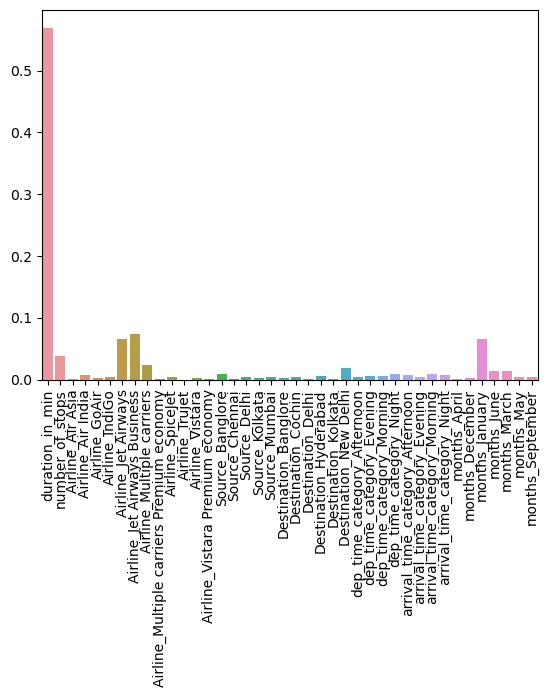

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x = X_train_.columns, y = importance)
plt.xticks(rotation = 90)
plt.show()